In [19]:
# | echo: false
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.offline as pyo
import panel as pn
from panel.widgets import Tabulator
from bokeh.models.widgets.tables import NumberFormatter, BooleanFormatter

In [3]:
# Load the dataset
data = pd.read_csv('crime_rate.csv')

data = data.dropna(subset=['Assaults'])
data[['City', 'State_temp']] = data['City, State'].str.split(', ', expand=True)
data.rename(columns={'State_temp': 'State'}, inplace=True)

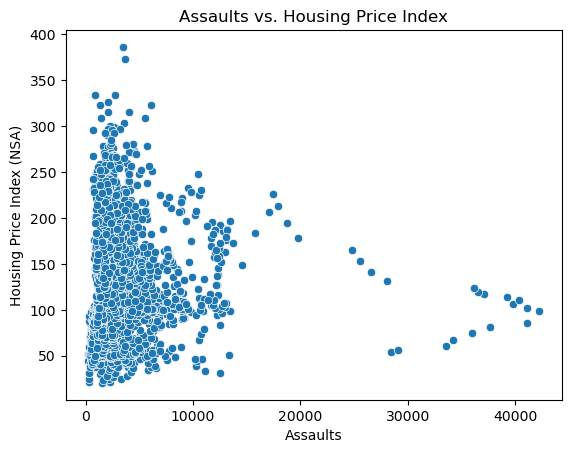

In [3]:
# Scatter plot with Seaborn
sns.scatterplot(data=data, x='Assaults', y='index_nsa')
plt.xlabel('Assaults')
plt.ylabel('Housing Price Index (NSA)')
plt.title('Assaults vs. Housing Price Index')
plt.show()

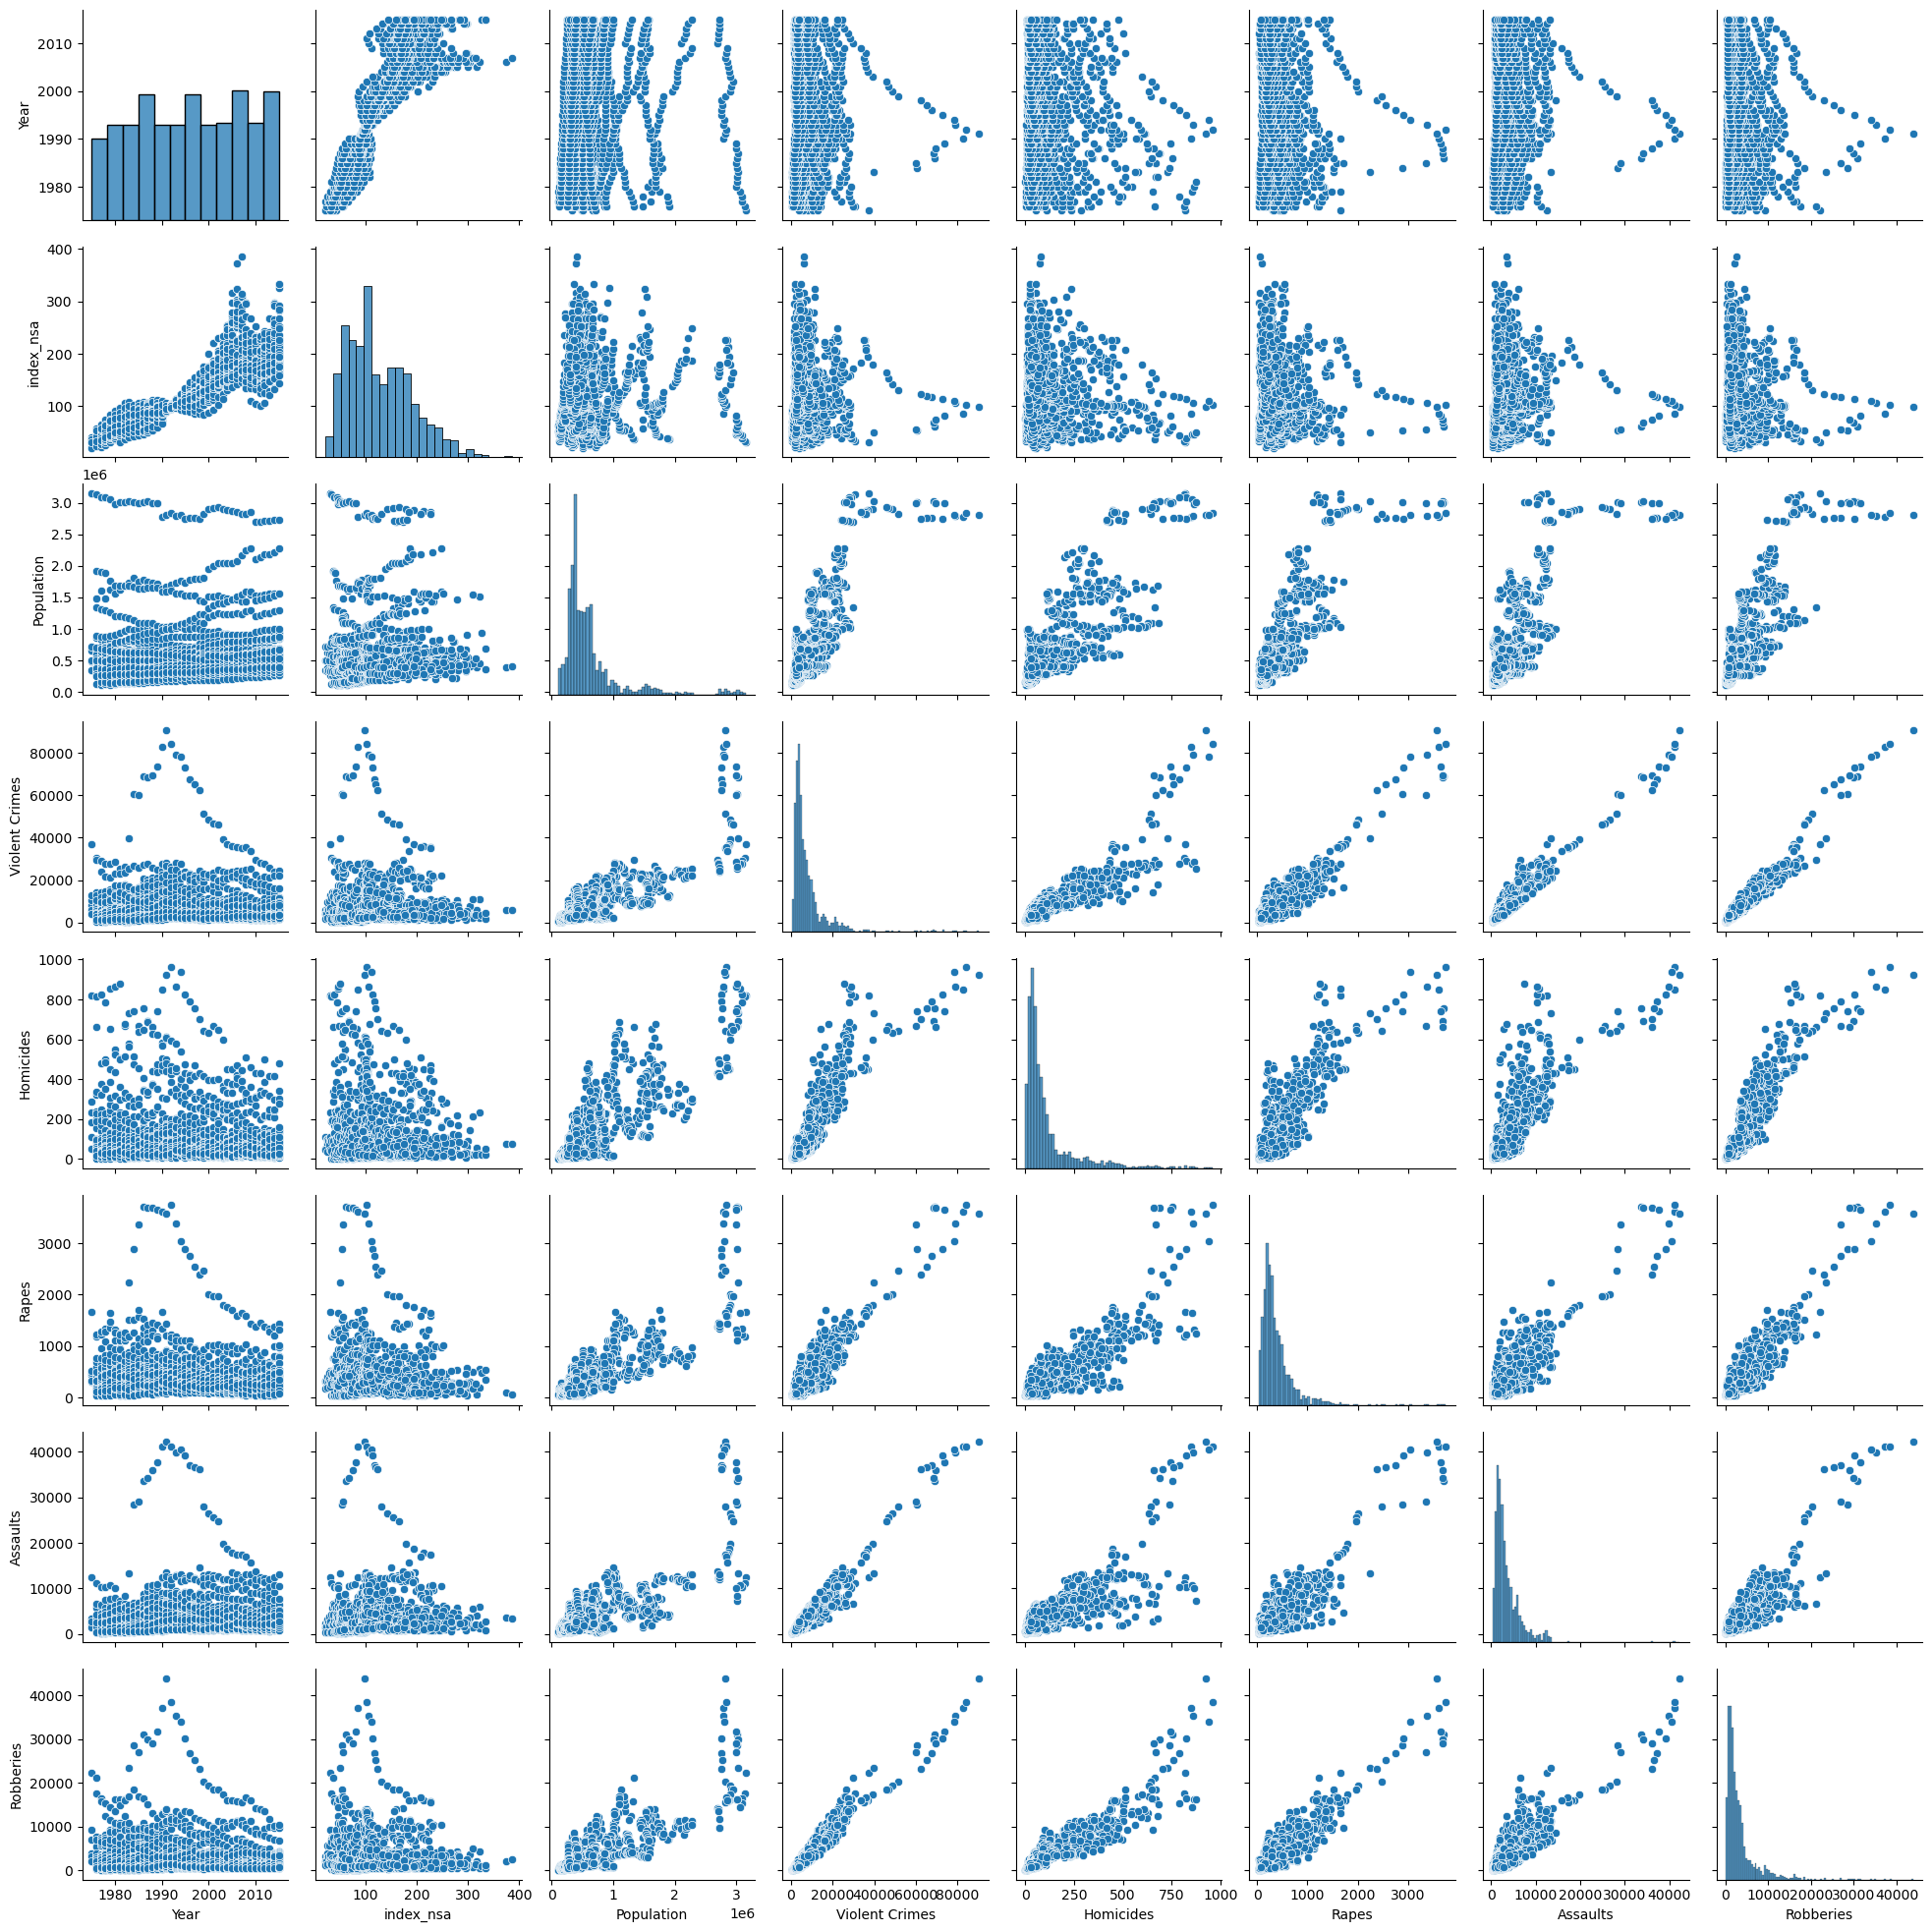

In [4]:
# Choropleth map with Plotly
fig = px.choropleth(data, locations='State', locationmode='USA-states', color='index_nsa',
                    scope='usa', hover_name='City', hover_data=['Violent Crimes', 'Homicides', 'Rapes', 'Assaults', 'Robberies'],
                    title='Housing Price Index by State')
fig.show()

# Pair plot with Seaborn
columns_to_plot = ['Year', 'index_nsa', 'Population', 'Violent Crimes', 'Homicides', 'Rapes', 'Assaults', 'Robberies']
sns.pairplot(data[columns_to_plot])
plt.show()

This uses Plotly Express to create a choropleth map visualizing the housing price index by state in the United States. It will produce an interactive choropleth map that visualizes the housing price index by state in the United States. The map will display the states color-coded based on the housing price index values, with darker colors representing higher values. Users can hover over the states to see more detailed information about the city and crime rates.

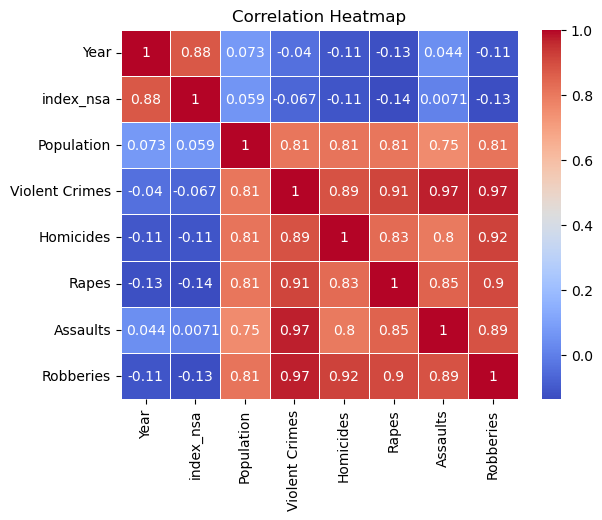

In [5]:
# Calculate the correlation matrix
corr_matrix = data[columns_to_plot].corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

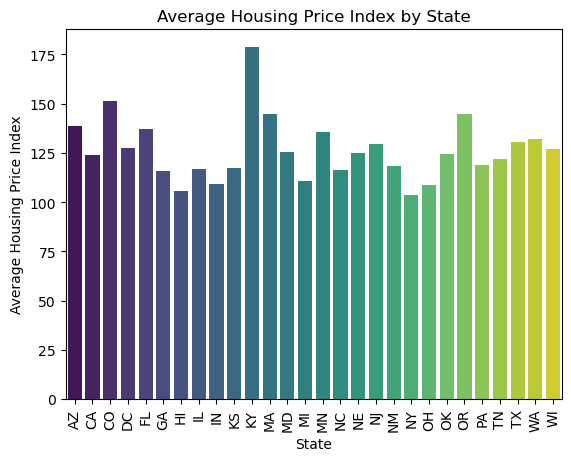

In [6]:
# Calculate the average housing price index by state
average_housing_prices = data.groupby('State')['index_nsa'].mean().reset_index()

# Create a bar plot using Seaborn
sns.barplot(data=average_housing_prices, x='State', y='index_nsa', palette='viridis')
plt.xlabel('State')
plt.ylabel('Average Housing Price Index')
plt.title('Average Housing Price Index by State')
plt.xticks(rotation=90)
plt.show()

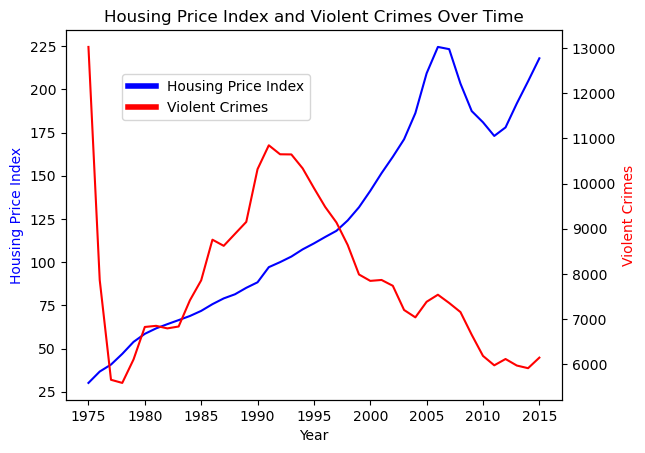

In [7]:
# | echo: false
# Calculate average housing prices and crime rates by year
yearly_data = data.groupby('Year')[['index_nsa', 'Violent Crimes', 'Homicides', 'Rapes', 'Assaults', 'Robberies']].mean().reset_index()

# Create a line plot using Seaborn
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.lineplot(data=yearly_data, x='Year', y='index_nsa', ax=ax1, color='blue')
sns.lineplot(data=yearly_data, x='Year', y='Violent Crimes', ax=ax2, color='red')

ax1.set_xlabel('Year')
ax1.set_ylabel('Housing Price Index', color='blue')
ax2.set_ylabel('Violent Crimes', color='red')

plt.title('Housing Price Index and Violent Crimes Over Time')

# Create a custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
ax1.legend(custom_lines, ['Housing Price Index', 'Violent Crimes'], loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

This uses the Seaborn library to create a line plot visualizing the relationship between the average housing price index and the number of violent crimes over time. It will produce a line plot that visualizes the relationship between the average housing price index and the number of violent crimes over time. The plot will display the housing price index and the number of violent crimes on two separate y-axes, allowing users to explore the trends in both variables over time.

In [8]:
# Calculate the violent crime rate per 100,000 population
data['Violent Crime Rate'] = data['Violent Crimes'] / data['Population'] * 100000

# Create an interactive scatter plot using Plotly
fig = px.scatter(
    data,
    x='index_nsa',
    y='Violent Crime Rate',
    color='State',
    hover_data=['City', 'Year', 'Population'],
    labels={
        'index_nsa': 'Housing Price Index',
        'Violent Crime Rate': 'Violent Crime Rate per 100,000 Population'
    },
    title='Housing Price Index vs. Violent Crime Rate',
    width=800,
    height=600
)

fig.show()

This uses the Plotly Express library to create an interactive scatter plot visualizing the relationship between the housing price index and the violent crime rate per 100,000 population for each state. It will produce an interactive scatter plot that allows users to explore the relationship between the housing price index and the violent crime rate per 100,000 population for each state. The plot will display the housing price index on the x-axis and the violent crime rate on the y-axis, with points color-coded by state. Users can hover over the points to see more detailed information about each data point.

In [9]:
# Calculate the average housing price index by state and year
state_housing_price = data.groupby(['State', 'Year'])['index_nsa'].mean().reset_index()

# Create the choropleth map with a slider for years
fig = go.Figure()

for year in state_housing_price['Year'].unique():
    fig.add_trace(
        go.Choropleth(
            locations=state_housing_price[state_housing_price['Year'] == year]['State'],
            z=state_housing_price[state_housing_price['Year'] == year]['index_nsa'],
            locationmode='USA-states',
            visible=False,
            colorscale='Viridis',
            reversescale=True,
            colorbar_title='Housing Price Index',
            text=state_housing_price[state_housing_price['Year'] == year]['State'],
            hovertemplate='<b>%{text}</b><br>Housing Price Index: %{z}<extra></extra>',
        )
    )

fig.update_layout(
    title_text='Housing Price Index by State',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'),
    sliders=[dict(
        active=0,
        currentvalue={'prefix': 'Year: '},
        pad={'t': 50},
        steps=[dict(label=f'{year}', method='update', args=[{'visible': [year == y for y in state_housing_price['Year'].unique()]}, {'title': f'Housing Price Index by State ({year})'}]) for year in state_housing_price['Year'].unique()])],
)

# Set the first year to visible by default
fig.data[0].visible = True

fig.show()

plot_div = pyo.plot(fig, output_type='div', include_plotlyjs='cdn', show_link=False)

In [10]:
# Create an interactive box plot using Plotly
fig = px.box(
    data,
    x='State',
    y='index_nsa',
    labels={
        'State': 'State',
        'index_nsa': 'Housing Price Index'
    },
    title='Housing Price Index Distribution by State',
    width=1000,
    height=600
)

fig.show()

In [11]:
# Prepare data for the line plot
assaults_by_year = data.groupby(['Year', 'State'])['Assaults'].sum().reset_index()

# Create a line plot with a dropdown menu using Plotly
fig = go.Figure()

for state in assaults_by_year['State'].unique():
    fig.add_trace(
        go.Scatter(
            x=assaults_by_year[assaults_by_year['State'] == state]['Year'],
            y=assaults_by_year[assaults_by_year['State'] == state]['Assaults'],
            name=state,
            visible=False,
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label=state, method='update', args=[{'visible': [s == state for s in assaults_by_year['State'].unique()]}, {'title': f'Number of Assaults in {state} Over Time'}]) for state in assaults_by_year['State'].unique()
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=-0.1,
            xanchor='left',
            y=1.1,
            yanchor='top',
        )
    ],
    title='Number of Assaults Over Time (Select State)',
    xaxis_title='Year',
    yaxis_title='Number of Assaults',
    height=600,
    width=800,
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0}
)

# Set the first state to visible by default
fig.data[0].visible = True

fig.show()

This Python code snippet uses the Plotly library to create an interactive line plot showing the number of assaults over time for each state, with a dropdown menu to select the state. It will produce an interactive line plot that allows users to explore the number of assaults over time for each state. The plot includes a dropdown menu for selecting the state, and the figure's title and data will update accordingly when a new state is selected.

In [12]:
# Calculate the average housing price index and number of assaults by state
state_data = data.groupby(['State']).agg({'index_nsa': 'mean', 'Assaults': 'sum'}).reset_index()

# Create scatter plot
scatter_fig = px.scatter(state_data, x='index_nsa', y='Assaults', text='State', hover_name='State', title='Housing Price Index vs. Assaults')
scatter_fig.update_traces(marker=dict(size=10, opacity=0.7), textposition='top center')

# Create bar plot
bar_fig = px.bar(state_data, x='State', y='Assaults', text='Assaults', hover_name='State', title='Assaults by State')
bar_fig.update_traces(marker=dict(opacity=0.7))

# Link scatter plot and bar plot
def update_point(trace, points, selector):
    selected_state = points.hovertext[0]
    with bar_fig.batch_update():
        for i, state in enumerate(bar_fig.data[0].x):
            if state == selected_state:
                bar_fig.data[0].marker.opacity[i] = 1
                bar_fig.data[0].text[i] = f'{state}: {int(bar_fig.data[0].y[i])}'
            else:
                bar_fig.data[0].marker.opacity[i] = 0.7
                bar_fig.data[0].text[i] = ""

scatter_fig.data[0].on_hover(update_point)

# Create subplot
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Housing Price Index vs. Assaults', 'Assaults by State'))
fig.add_trace(scatter_fig.data[0], row=1, col=1)
fig.add_trace(bar_fig.data[0], row=1, col=2)

# Set layout
fig.update_layout(showlegend=False)
fig.show()

In [13]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import CustomJS, ColumnDataSource, HoverTool, BoxSelectTool

output_notebook()

# Create ColumnDataSource for Bokeh
source = ColumnDataSource(state_data)

# Create scatter plot
scatter_plot = figure(title='Housing Price Index vs. Assaults', x_axis_label='Housing Price Index', y_axis_label='Assaults')
scatter_plot.scatter('index_nsa', 'Assaults', source=source, size=10, alpha=0.7)

# Add hover tool to scatter plot
scatter_hover = HoverTool(tooltips=[('State', '@State'), ('Housing Price Index', '@index_nsa'), ('Assaults', '@Assaults')])
scatter_plot.add_tools(scatter_hover)

# Create bar plot
bar_plot = figure(title='Assaults by State', x_axis_label='State', y_axis_label='Assaults', x_range=state_data['State'].tolist(), tools=[BoxSelectTool()])
bar_plot.vbar(x='State', top='Assaults', source=source, width=0.5, alpha=0.7)

# Add hover tool to bar plot
bar_hover = HoverTool(tooltips=[('State', '@State'), ('Assaults', '@Assaults')])
bar_plot.add_tools(bar_hover)

# Create layout and display the plots
layout = gridplot([[scatter_plot, bar_plot]], toolbar_location=None)
show(layout)

Loading BokehJS ...

This method uses the Bokeh library to create an interactive visualization of housing price index versus the number of assaults for different states. The visualization consists of a scatter plot and a bar plot, both of which include hover tools for displaying information about the data points. It will produce an interactive visualization that allows users to explore the relationship between the housing price index and the number of assaults in different states.

In [14]:
import altair as alt

# Calculate the crime rate for each state
data['CrimeRate'] = data['Assaults'] / data['Population']

# Create an Altair chart
alt_chart = alt.Chart(data).mark_bar().encode(
    x='State',
    y='index_nsa',
    color=alt.Color('CrimeRate', scale=alt.Scale(scheme='viridis')),
    tooltip=['State', 'index_nsa', 'CrimeRate']
).properties(
    title='Housing Price Index by State (Color-coded by Crime Rate)',
    width=800
)

# Display the chart
alt_chart

alt.Chart(...)

This uses the Altair library to create an interactive bar chart visualizing the housing price index for each state, with the bars color-coded based on the crime rate. It will produce an interactive bar chart that allows users to explore the relationship between the housing price index and the crime rate in different states. The chart will display the housing price index for each state on the y-axis and use color-coding to represent the crime rate. Users can hover over the bars to see more detailed information about each state.

In [15]:
def load_data():
    df = pd.read_csv('crime_rate.csv')
    df = df.dropna(subset=['Assaults'])
    df[['City', 'State_temp']] = df['City, State'].str.split(', ', expand=True)
    df.rename(columns={'State_temp': 'State'}, inplace=True)
    return df

In [16]:
# Scatter plot
def create_scatter_plot(data):
    fig = px.scatter(data, x='Violent Crimes', y='Homicides', hover_data=['City, State'], trendline='ols')
    fig.show()

In [17]:
# Bubble plot
def create_bubble_plot(data):
    fig = px.scatter(data, x='Violent Crimes', y='Rapes', size='Assaults', hover_data=['City, State'], color='Year')
    fig.show()

In [18]:
# Parallel coordinate plot
def create_parallel_coordinate_plot(data):
    fig = px.parallel_coordinates(data, dimensions=['Homicides', 'Rapes', 'Assaults', 'Robberies'], color='Year')
    fig.show()

In [19]:
# Box plot
def create_box_plot(data):
    fig = px.box(data, x='Year', y='Violent Crimes')
    fig.show()

In [20]:
def create_innovative_visualization(data):
    fig = px.scatter(data, x='Violent Crimes', y='Robberies', size='Homicides', color='Year',
                     hover_data=['City, State'], trendline='ols')
    fig.show()

In [21]:
def main():
    data = load_data()
    create_scatter_plot(data)
    create_bubble_plot(data)
    create_parallel_coordinate_plot(data)
    create_box_plot(data)
    create_innovative_visualization(data)

if __name__ == "__main__":
    main()

/Users/lutianshu/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In the United States, there is a certain relationship between crime rates and housing prices. The following is a brief analysis of this phenomenon based on the content discussed earlier:

Negative correlation between crime rates and housing prices: Generally, areas with higher crime rates have lower housing prices, while areas with lower crime rates have higher housing prices. This is because people usually prefer to live in a safe environment, so safety has a significant impact on housing prices. High crime areas are less attractive, demand decreases, and housing prices subsequently decline.

Community safety and housing prices: Community safety is related not only to crime rates but also to other factors such as education, infrastructure, and socio-economic conditions. High-quality education and good infrastructure attract more homebuyers, thereby increasing housing prices. On the other hand, prosperous communities typically have lower crime rates, which in turn raises housing prices.

Geographic location and crime: In some cities, criminal activities may be concentrated in specific areas, which could be related to local economic conditions, unemployment rates, and social inequality. These factors often lead to lower housing prices in these areas.

Crime types and housing prices: The impact of different types of crime on housing prices may vary. For example, violent crimes (such as robbery and assault) may have a more significant impact on housing prices than property crimes (such as theft). Homebuyers may be more concerned about crimes that pose a threat to their personal safety.

In summary, crime rates in the United States have a certain influence on housing prices. Areas with high crime rates usually have lower housing prices and vice versa. However, crime rates are just one of many factors affecting housing prices, and other factors such as location, education, and infrastructure are equally important. When evaluating housing prices, these factors need to be considered comprehensively. The relationship between crime rates and housing prices in the United States can be observed in specific regions, such as New York City, Los Angeles, Chicago, and Houston. Areas with higher crime rates generally have lower housing prices, while those with lower crime rates have higher housing prices. This relationship is influenced by factors such as infrastructure, education, and socio-economic conditions. When evaluating housing prices, it's essential to consider these factors comprehensively.

In [22]:
html_string = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Choropleth Map</title>
</head>
<body>
    {plot_div}
</body>
</html>
"""

with open("choropleth_map.html", "w") as f:
    f.write(html_string)
